# `spaxelsleuth` examples (S7)
---
In this notebook, you will learn how to use `spaxelsleuth` to 
1. create a `pandas` DataFrame containing spaxel-by-spaxel information for galaxies in the S7 survey;
2. use the included plotting tools to analyse the S7 data;
3. create plots that you can use to analyse specific galaxies. 

In [1]:
from spaxelsleuth import load_user_config
load_user_config("/home/u5708159/.spaxelsleuthconfig.json")
from spaxelsleuth.config import settings

## Create the DataFrames
---
### Creating the "metadata" DataFrame
After you have installed `spaxelsleuth` and have downloaded the necessary files from [DataCentral](http://datacentral.org.au) (see the README), the first step is to create the "metadata" DataFrame containing basic information about each S7 galaxy, such as redshifts and stellar masses.

In [2]:
from spaxelsleuth.loaddata.s7 import make_s7_metadata_df
make_s7_metadata_df()

In make_s7_metadata_df(): Creating metadata DataFrame...
In make_s7_metadata_df(): Computing distances...
In make_s7_metadata_df(): Saving metadata DataFrame to file /data/misfit/u5708159/S7/s7_metadata.hd5...
In make_s7_metadata_df(): Finished!


In [3]:
from spaxelsleuth.loaddata.s7 import load_s7_metadata_df
df_metadata = load_s7_metadata_df()

In [4]:
df_metadata

,ID,i (degrees),R_e (arcsec),R_e error (arcsec),b/a,b/a error,PA (degrees),WiFeS PA,log M_*,log M_* error,...,BPT (global),z,x0_px,y0_px,RA (J2000),Dec (J2000),D_A (Mpc),D_L (Mpc),kpc per arcsec,Good?
ID,,,,,,,,,,,,,,,,,,,,,
3C278,3C278,90.00,3.783547,0.420127,NaN,NaN,133.50,90,NaN,NaN,...,Negligible emission (elliptical),0.015000,11,18,193.650417,-12.5633,63.077571,64.984091,0.305809,True
ARK402,ARK402,57.36,3.041907,0.317556,NaN,NaN,97.86,90,10.572990,0.0084,...,SB + Seyfert 2,0.017807,13,18,197.208792,-0.8172,74.627323,77.308764,0.361803,True
ESO103-G35,ESO103-G35,83.71,2.340845,0.208995,0.363,0.044,41.63,90,10.792383,0.0092,...,Seyfert 2,0.013286,12,15,279.585417,-65.4275,55.986198,57.483746,0.271429,True
ESO137-G34,ESO137-G34,41.13,7.210910,0.578860,0.759,0.093,18.23,90,10.072409,0.0316,...,Seyfert 2,0.009144,13,16,248.809208,-58.0781,38.726616,39.438086,0.187752,True
ESO138-G01,ESO138-G01,60.85,2.249518,0.316227,0.501,0.061,140.88,90,10.815106,0.0088,...,Seyfert 2,0.009127,10,17,252.835417,-59.2364,38.655618,39.364462,0.187408,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NGC835,NGC835,34.86,NaN,NaN,0.832,0.101,4.58,0,10.428856,0.0088,...,LINER,0.013586,12,15,32.352500,-10.1364,57.229534,58.795138,0.277457,True
PKS0056-572,PKS0056-572,NaN,0.671018,NaN,NaN,NaN,NaN,0,NaN,NaN,...,QSO + Seyfert 1,0.679000,11,17,14.694583,-56.9861,1455.820717,4104.018290,7.058018,True
PKS1306-241,PKS1306-241,69.96,NaN,NaN,NaN,NaN,124.35,90,10.079275,0.0096,...,SB + Seyfert 2,0.013926,12,20,197.174208,-24.3825,58.637549,60.282094,0.284283,True


### Creating the S7 DataFrame
The first step is to create the DataFrame containing all measured quantities, such as emission line fluxes, stellar and gas kinematics, and extinction, for each individual spaxel in the S7 galaxies. The resulting DataFrames are saved to file and can be accessed using `load_s7_df()`.

The input arguments are as follows:
* `gals` is a list of galaxies for which you want to create the DataFrame. If unspecified, it will run on the full S7 sample.
* `eline_SNR_min` gives the minimum S/N for which a fitted emission line component will be accepted. All quantities associated with emission line components that fall below this S/N threshold (e.g. kinematics, fluxes, etc.) will be set to `np.nan`.
* `correct_extinction` controls whether extinction correction is applied to the emission line fluxes or not.
* `metallicity_diagnostics` controls which strong-line metallicity diagnostics are evaluated.

In [6]:
from spaxelsleuth.loaddata.s7 import make_s7_df

In [11]:
make_s7_df(gals=["NGC1068", "MARK573", "NGC6860"],
            eline_SNR_min=3,
            correct_extinction=True,
            metallicity_diagnostics=["N2Ha_PP04",],
            nthreads=1)


In lzifu2.make_s7_df() [eline_SNR_min=3]: Running sequentially...


/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/dqcut.py:45: RuntimeWarning: All-NaN slice encountered
  A_HALPHA_map = np.nanmax(data_cube_masked_R, axis=0)


In _process_s7(): Finished processing NGC1068
In _process_s7(): Finished processing MARK573
In _process_s7(): Finished processing NGC6860


/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/addcolumns.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Number of components (original)"] = ncomponents_original
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/continuum.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{eline} EW (component {nn + 1})"] = df[f"{eline} (component {nn + 1})"] / df[f"{eline} continuum"]
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/continuum.py:78: PerformanceWarning: DataFrame is high

////////////////////////////////////////////////////////////////////
In dqcut.set_flags(): Flagging low S/N components and spaxels...
In dqcut.set_flags(): Flagging components and spaxels with NaN fluxes and finite errors...
OII3726 (total): 0 spaxels have missing total fluxes
OII3729 (total): 0 spaxels have missing total fluxes
OIII4363 (total): 0 spaxels have missing total fluxes
HBETA (component 1): 0 spaxels have missing fluxes in this component
HBETA (component 2): 0 spaxels have missing fluxes in this component
HBETA (component 3): 0 spaxels have missing fluxes in this component
HBETA (total): 39 spaxels have missing total fluxes
OIII5007 (component 1): 0 spaxels have missing fluxes in this component
OIII5007 (component 2): 0 spaxels have missing fluxes in this component
OIII5007 (component 3): 0 spaxels have missing fluxes in this component
OIII5007 (total): 0 spaxels have missing total fluxes
OI6300 (component 1): 0 spaxels have missing fluxes in this component
OI6300 (componen

/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/dqcut.py:535: UserWarning: using only sigma_gas to define 'missing components'...
  warnings.warn("using only sigma_gas to define 'missing components'...")
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/extcorr.py:25: RuntimeWarning: invalid value encountered in double_scalars
  df_row[f"{eline}"] *= 10**(0.4 * A_line)
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/extcorr.py:26: RuntimeWarning: invalid value encountered in double_scalars
  df_row[f"{eline} error"] *= 10**(0.4 * A_line)


In extcorr.extinction_corr_fn(): computing A_V sequentially...
In extcorr.extinction_corr_fn(): computing A_V sequentially...
In extcorr.extinction_corr_fn(): computing A_V sequentially...


/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_co

In calculate_metallicity(N2Ha_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(N2Ha_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate N2Ha_PP04 log(O/H) + 12  in 139/2850 (4.88%) of rows


  0%|          | 0/1000 [00:00<?, ?it/s]/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:509: RuntimeWarning: divide by zero encountered in log10
  logR = np.log10(df["NII6583"].values / df["HALPHA"].values)
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:510: RuntimeWarning: invalid value encountered in add
  logOH12 = 9.37 + 2.03 * logR + 1.26 * logR**2 + 0.32 * logR**3
100%|██████████| 1000/1000 [00:01<00:00, 596.33it/s]
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:685: RuntimeWarning: Mean of empty slice
  df[f"log(O/H) + 12 ({met_diagnostic})"] = np.nanmean(logOH12_vals, axis=0)
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:687: RuntimeWarning: Mean of empty slice
  df[f"log(O/H) + 12 ({met_diagnostic}) error (lower)"] = np.nanmean(logOH12_vals, axis=0) - np.quantile(logOH12_vals, q=0.16, axis=0)
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metal

In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(N2Ha_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(N2Ha_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:1.71605
In calculate_metallicity(N2Ha_M13, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(N2Ha_M13, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate N2Ha_M13 log(O/H) + 12  in 139/2850 (4.88%) of rows


  0%|          | 0/1000 [00:00<?, ?it/s]/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:517: RuntimeWarning: divide by zero encountered in log10
  logR = np.log10(df["NII6583"].values / df["HALPHA"].values)
100%|██████████| 1000/1000 [00:01<00:00, 608.26it/s]


In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(N2Ha_M13, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(N2Ha_M13, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:1.67571
In calculate_metallicity(O3N2_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(O3N2_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate O3N2_PP04 log(O/H) + 12  in 139/2850 (4.88%) of rows


  0%|          | 0/1000 [00:00<?, ?it/s]/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:525: RuntimeWarning: divide by zero encountered in true_divide
  logR = np.log10((df["OIII5007"].values / df["HBETA"].values) / (df["NII6583"].values / df["HALPHA"].values))
100%|██████████| 1000/1000 [00:03<00:00, 325.23it/s]


In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(O3N2_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(O3N2_PP04, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:3.10858
In calculate_metallicity(O3N2_M13, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(O3N2_M13, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate O3N2_M13 log(O/H) + 12  in 139/2850 (4.88%) of rows


  0%|          | 0/1000 [00:00<?, ?it/s]/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:533: RuntimeWarning: divide by zero encountered in true_divide
  logR = np.log10((df["OIII5007"].values / df["HBETA"].values) / (df["NII6583"].values / df["HALPHA"].values))
100%|██████████| 1000/1000 [00:03<00:00, 323.63it/s]


In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(O3N2_M13, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(O3N2_M13, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:3.12296
In calculate_metallicity(N2S2Ha_D16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(N2S2Ha_D16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate N2S2Ha_D16 log(O/H) + 12  in 139/2850 (4.88%) of rows


  0%|          | 0/1000 [00:00<?, ?it/s]/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:541: RuntimeWarning: invalid value encountered in true_divide
  logR = np.log10(df["NII6583"].values / df["SII6716+SII6731"].values) + 0.264 * np.log10(df["NII6583"].values / df["HALPHA"].values)
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:541: RuntimeWarning: divide by zero encountered in log10
  logR = np.log10(df["NII6583"].values / df["SII6716+SII6731"].values) + 0.264 * np.log10(df["NII6583"].values / df["HALPHA"].values)
100%|██████████| 1000/1000 [00:02<00:00, 404.61it/s]


In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(N2S2Ha_D16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(N2S2Ha_D16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:2.50702
In calculate_metallicity(N2O2_KD02, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(N2O2_KD02, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate N2O2_KD02 log(O/H) + 12  in 48/2850 (1.68%) of rows


  0%|          | 0/1000 [00:00<?, ?it/s]/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:501: RuntimeWarning: divide by zero encountered in log10
  logR = np.log10(df["NII6583"].values / (df["OII3726+OII3729"].values))
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:502: RuntimeWarning: invalid value encountered in add
  logOH12 = np.log10(1.54020 + 1.26602 * logR + 0.167977 * logR**2 ) + 8.93
100%|██████████| 1000/1000 [00:01<00:00, 598.91it/s]


In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(N2O2_KD02, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(N2O2_KD02, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:1.70026
In calculate_metallicity(Rcal_PG16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(Rcal_PG16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate Rcal_PG16 log(O/H) + 12  in 48/2850 (1.68%) of rows


  0%|          | 0/1000 [00:00<?, ?it/s]/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:592: RuntimeWarning: divide by zero encountered in log10
  logN2Hb = np.log10((df["NII6548+NII6583"].values) / df["HBETA"].values)
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:600: RuntimeWarning: invalid value encountered in add
  logOH12[pts_lower] = 7.932 + 0.944 * logO32[pts_lower] + 0.695 * logN2Hb[pts_lower] + ( 0.970 - 0.291 * logO32[pts_lower] - 0.019 * logN2Hb[pts_lower]) * logO2Hb[pts_lower]
100%|██████████| 1000/1000 [00:03<00:00, 319.54it/s]


In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(Rcal_PG16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(Rcal_PG16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:3.15749
In calculate_metallicity(Scal_PG16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(Scal_PG16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate Scal_PG16 log(O/H) + 12  in 139/2850 (4.88%) of rows


  0%|          | 0/1000 [00:00<?, ?it/s]/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:608: RuntimeWarning: divide by zero encountered in true_divide
  logO3S2 = np.log10((df["OIII4959+OIII5007"].values) / (df["SII6716+SII6731"].values))
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:609: RuntimeWarning: divide by zero encountered in log10
  logN2Hb = np.log10((df["NII6548+NII6583"].values) / df["HBETA"].values)
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:610: RuntimeWarning: divide by zero encountered in log10
  logS2Hb = np.log10((df["SII6716+SII6731"].values) / df["HBETA"].values)
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:617: RuntimeWarning: invalid value encountered in add
  logOH12[pts_lower] = 8.072 + 0.789 * logO3S2[pts_lower] + 0.726 * logN2Hb[pts_lower] + ( 1.069 - 0.170 * logO3S2[pts_lower] + 0.022 * logN2Hb[pts_lower]) * logS2Hb[pts_lower]
100%|███

In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(Scal_PG16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(Scal_PG16, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:3.23807
In calculate_metallicity(ON_P10, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(ON_P10, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate ON_P10 log(O/H) + 12  in 48/2850 (1.68%) of rows


  0%|          | 0/1000 [00:00<?, ?it/s]/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:572: RuntimeWarning: divide by zero encountered in log10
  logN2 = np.log10(df["NII6548+NII6583"].values / df["HBETA"].values)
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:573: RuntimeWarning: divide by zero encountered in log10
  logS2 = np.log10(df["SII6716+SII6731"].values / df["HBETA"].values)
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:579: RuntimeWarning: invalid value encountered in subtract
  pts_warm = (logN2 < -0.1) & ((logN2 - logS2) >= -0.25)
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:580: RuntimeWarning: invalid value encountered in subtract
  pts_hot = (logN2 < -0.1) & ((logN2 - logS2) < -0.25)
100%|██████████| 1000/1000 [00:03<00:00, 255.54it/s]


In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(ON_P10, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(ON_P10, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:3.94438
In calculate_metallicity(ONS_P10, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(ONS_P10, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate ONS_P10 log(O/H) + 12  in 48/2850 (1.68%) of rows


  0%|          | 0/1000 [00:00<?, ?it/s]/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:549: RuntimeWarning: divide by zero encountered in log10
  logN2 = np.log10(df["NII6548+NII6583"].values / df["HBETA"].values)
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:550: RuntimeWarning: divide by zero encountered in log10
  logS2 = np.log10(df["SII6716+SII6731"].values / df["HBETA"].values)
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:559: RuntimeWarning: invalid value encountered in subtract
  pts_warm = (logN2 < -0.1) & ((logN2 - logS2) >= -0.25)
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:560: RuntimeWarning: invalid value encountered in subtract
  pts_hot = (logN2 < -0.1) & ((logN2 - logS2) < -0.25)
100%|██████████| 1000/1000 [00:03<00:00, 252.07it/s]


In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(ONS_P10, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(ONS_P10, logU=None, compute_logU=False, ion_diagnostic=None, compute_errors=True, niters=1000): Done! Total time = 0:0:4.00012
In calculate_metallicity(N2Ha_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(N2Ha_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate N2Ha_K19/O3O2_K19 log(O/H) + 12  in 48/2850 (1.68%) of rows


  0%|          | 0/1000 [00:00<?, ?it/s]/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:314: RuntimeWarning: divide by zero encountered in log10
  logR = np.log10(df["NII6583"].values / df["HALPHA"].values)
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:343: RuntimeWarning: invalid value encountered in add
  + met_coeffs_K19[met_diagnostic]["J"] * y**3
100%|██████████| 1000/1000 [00:03<00:00, 260.79it/s]
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:676: RuntimeWarning: Mean of empty slice
  df[f"log(O/H) + 12 ({met_diagnostic}/{ion_diagnostic})"] = np.nanmean(logOH12_vals, axis=0)
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:677: RuntimeWarning: Mean of empty slice
  df[f"log(U) ({met_diagnostic}/{ion_diagnostic})"] = np.nanmean(logU_vals, axis=0)
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:679: RuntimeWarning: Mean of empty slice
 

In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(N2Ha_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(N2Ha_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Done! Total time = 0:0:3.86739
In calculate_metallicity(O3N2_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(O3N2_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate O3N2_K19/O3O2_K19 log(O/H) + 12  in 48/2850 (1.68%) of rows


  0%|          | 0/1000 [00:00<?, ?it/s]/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:322: RuntimeWarning: divide by zero encountered in true_divide
  logR = np.log10((df["OIII5007"].values / df["HBETA"].values) / (df["NII6583"].values / df["HALPHA"].values))
100%|██████████| 1000/1000 [00:05<00:00, 187.06it/s]


In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(O3N2_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(O3N2_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Done! Total time = 0:0:5.38144
In calculate_metallicity(N2O2_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(N2O2_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate N2O2_K19/O3O2_K19 log(O/H) + 12  in 48/2850 (1.68%) of rows


  0%|          | 0/1000 [00:00<?, ?it/s]/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:328: RuntimeWarning: divide by zero encountered in log10
  logR = np.log10(df["NII6583"].values / (df["OII3726+OII3729"].values))
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:367: RuntimeWarning: overflow encountered in power
  + ion_coeffs_K19[ion_diagnostic]["J"] * y**3
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:367: RuntimeWarning: invalid value encountered in multiply
  + ion_coeffs_K19[ion_diagnostic]["J"] * y**3
/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:367: RuntimeWarning: overflow encountered in square
  + ion_coeffs_K19[ion_diagnostic]["J"] * y**3
 24%|██▎       | 235/1000 [00:00<00:02, 256.87it/s]/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:343: RuntimeWarning: overflow encountered in power
  + met_coeffs_K19[met_diagnostic]["J"] 

In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(N2O2_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(N2O2_K19, logU=None, compute_logU=True, ion_diagnostic=O3O2_K19, compute_errors=True, niters=1000): Done! Total time = 0:0:3.90894
In calculate_metallicity(R23_KK04, logU=None, compute_logU=True, ion_diagnostic=O3O2_KK04, compute_errors=True, niters=1000): Removing column suffixes...
In calculate_metallicity(R23_KK04, logU=None, compute_logU=True, ion_diagnostic=O3O2_KK04, compute_errors=True, niters=1000): Computing metallicities with errors...
In _get_metallicity(): able to calculate R23_KK04/O3O2_KK04 log(O/H) + 12  in 48/2850 (1.68%) of rows


  0%|          | 0/1000 [00:00<?, ?it/s]/home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/metallicity.py:424: RuntimeWarning: divide by zero encountered in log10
  logN2O2 = np.log10(df["NII6583"].values / df["OII3726+OII3729"].values)
100%|██████████| 1000/1000 [00:05<00:00, 168.06it/s]


In _get_metallicity(): Concatenating DataFrames...
In _get_metallicity(): Done!
In calculate_metallicity(R23_KK04, logU=None, compute_logU=True, ion_diagnostic=O3O2_KK04, compute_errors=True, niters=1000): Adding column suffixes...
In calculate_metallicity(R23_KK04, logU=None, compute_logU=True, ion_diagnostic=O3O2_KK04, compute_errors=True, niters=1000): Done! Total time = 0:0:5.98632
In lzifu2.make_s7_df() [eline_SNR_min=3]: Saving to file s7_default_merge-comp_extcorr_minSNR=3.hd5...
In lzifu2.make_s7_df() [eline_SNR_min=3]: Finished!


/home/u5708159/.conda/envs/py37/lib/python3.7/site-packages/pandas/core/generic.py:2718: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['ID', 'BPT (total)', 'x, y (pixels)'], dtype='object')]

  encoding=encoding,


### Load the S7 DataFrame we just created

In [12]:
from spaxelsleuth.loaddata.s7 import load_s7_df

df = load_s7_df(
    correct_extinction=True,
    eline_SNR_min=3,
)

In load_s7_df(): Loading DataFrame from file /data/misfit/u5708159/S7/s7_default_merge-comp_extcorr_minSNR=3.hd5 [last modified 2023-08-22 16:32:28.512139]...
In load_s7_df(): Finished!


In addition to the measured quantities released in DR3, the DataFrame also contains various other measurements, such as line ratios, spectral categories, equivalent widths, and the like:

In [13]:
df

,i (degrees),R_e (arcsec),R_e error (arcsec),b/a,b/a error,PA (degrees),WiFeS PA,log M_*,log M_* error,z,...,sigma_gas_SNR_cut,stekin_cut,Extinction correction applied,"x, y (pixels)",survey,ncomponents,bin_type,debug,flux units,continuum units
0,24.15,4.779031,0.490724,0.851,0.040,NaN,45,NaN,NaN,0.003793,...,True,False,True,"(0.0, 0.0)",s7,merge,default,False,E-16 erg/cm^2/s,E-16 erg/cm^2/Å/s
1,24.15,4.779031,0.490724,0.851,0.040,NaN,45,NaN,NaN,0.003793,...,True,False,True,"(1.0, 0.0)",s7,merge,default,False,E-16 erg/cm^2/s,E-16 erg/cm^2/Å/s
2,24.15,4.779031,0.490724,0.851,0.040,NaN,45,NaN,NaN,0.003793,...,True,False,True,"(2.0, 0.0)",s7,merge,default,False,E-16 erg/cm^2/s,E-16 erg/cm^2/Å/s
3,24.15,4.779031,0.490724,0.851,0.040,NaN,45,NaN,NaN,0.003793,...,True,False,True,"(3.0, 0.0)",s7,merge,default,False,E-16 erg/cm^2/s,E-16 erg/cm^2/Å/s
4,24.15,4.779031,0.490724,0.851,0.040,NaN,45,NaN,NaN,0.003793,...,True,False,True,"(4.0, 0.0)",s7,merge,default,False,E-16 erg/cm^2/s,E-16 erg/cm^2/Å/s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,57.99,2.718000,0.216667,0.562,0.054,31.61,0,11.291301,0.0092,0.014884,...,True,False,True,"(20.0, 37.0)",s7,merge,default,False,E-16 erg/cm^2/s,E-16 erg/cm^2/Å/s
2846,57.99,2.718000,0.216667,0.562,0.054,31.61,0,11.291301,0.0092,0.014884,...,True,False,True,"(21.0, 37.0)",s7,merge,default,False,E-16 erg/cm^2/s,E-16 erg/cm^2/Å/s
2847,57.99,2.718000,0.216667,0.562,0.054,31.61,0,11.291301,0.0092,0.014884,...,True,False,True,"(22.0, 37.0)",s7,merge,default,False,E-16 erg/cm^2/s,E-16 erg/cm^2/Å/s
2848,57.99,2.718000,0.216667,0.562,0.054,31.61,0,11.291301,0.0092,0.014884,...,True,False,True,"(23.0, 37.0)",s7,merge,default,False,E-16 erg/cm^2/s,E-16 erg/cm^2/Å/s


In [14]:
for col in df.columns:
    print(col)

i (degrees)
R_e (arcsec)
R_e error (arcsec)
b/a
b/a error
PA (degrees)
WiFeS PA
log M_*
log M_* error
z
x0_px
y0_px
RA (J2000)
Dec (J2000)
D_A (Mpc)
D_L (Mpc)
kpc per arcsec
ID
v_gas (component 1)
v_gas error (component 1)
v_gas (component 2)
v_gas error (component 2)
v_gas (component 3)
v_gas error (component 3)
sigma_gas (component 1)
sigma_gas error (component 1)
sigma_gas (component 2)
sigma_gas error (component 2)
sigma_gas (component 3)
sigma_gas error (component 3)
OII3726 (total)
OII3726 error (total)
OII3729 (total)
OII3729 error (total)
OIII4363 (total)
OIII4363 error (total)
HBETA (total)
HBETA error (total)
HBETA (component 1)
HBETA error (component 1)
HBETA (component 2)
HBETA error (component 2)
HBETA (component 3)
HBETA error (component 3)
OIII5007 (total)
OIII5007 error (total)
OIII5007 (component 1)
OIII5007 error (component 1)
OIII5007 (component 2)
OIII5007 error (component 2)
OIII5007 (component 3)
OIII5007 error (component 3)
OI6300 (total)
OI6300 error (total)
OI6

In [15]:
# Calculate the number of spaxels with different spectral classifications 
n_spaxels_tot = df.shape[0]
spec_cats = df["BPT (total)"].unique()  # List of spectral categories in the data set
for spec_cat in spec_cats:
    cond = df["BPT (total)"] == spec_cat
    n_spaxels = df[cond].shape[0]
    print(f"There are {n_spaxels} spaxels ({n_spaxels / n_spaxels_tot * 100:.2f}%) classified as {spec_cat}")

There are 1449 spaxels (50.84%) classified as Not classified
There are 429 spaxels (15.05%) classified as Composite
There are 139 spaxels (4.88%) classified as SF
There are 564 spaxels (19.79%) classified as Seyfert
There are 263 spaxels (9.23%) classified as Ambiguous
There are 6 spaxels (0.21%) classified as LINER


Text(0, 0.5, '$N$')

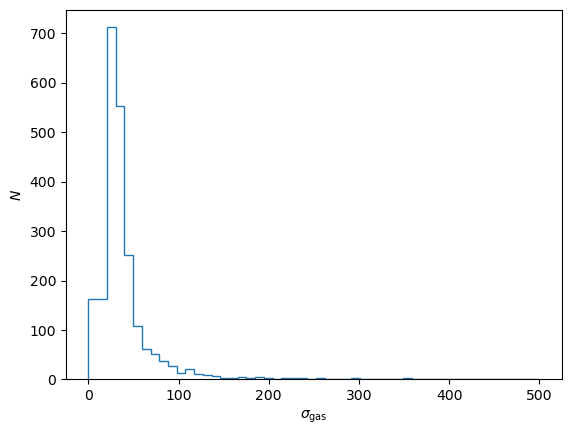

In [16]:
# Histograms showing the distribution in velocity dispersion
import matplotlib.pyplot as plt
from astropy.visualization import hist
fig, ax = plt.subplots(nrows=1, ncols=1)
hist(df[f"sigma_gas (component 1)"].values, bins="scott", ax=ax, range=(0, 500), density=False, histtype="step")
ax.set_xlabel(r"$\sigma_{\rm gas}$")
ax.set_ylabel(r"$N$")

You can also select a subset of the full data sample as follows:

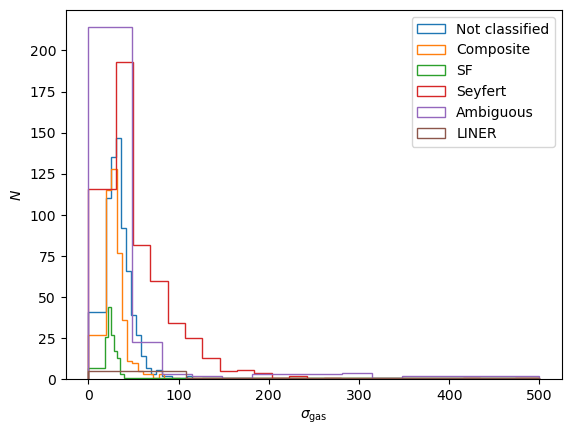

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1)
for cat in df["BPT (total)"].unique():
    df_cat = df[df["BPT (total)"] == cat]
    hist(df_cat[f"sigma_gas (component 1)"].values, bins="scott", ax=ax, range=(0, 500), density=False, histtype="step", label=cat)
ax.set_xlabel(r"$\sigma_{\rm gas}$")
ax.set_ylabel(r"$N$")
ax.legend()

## Using `spaxelsleuth.plotting`
--- 
In the below cells, we will demonstrate how to use various functions in `spaxelsleuth.plotting` to make different kinds of plots useful for analysing the data set.

In [19]:
%matplotlib widget

In [20]:
from spaxelsleuth.plotting.plottools import plot_empty_BPT_diagram, plot_BPT_lines
from spaxelsleuth.plotting.plotgalaxies import plot2dhistcontours, plot2dscatter

#### Plot the distribution of spaxels in the WHAN diagram
The WHAN diagram, developed by Cid Fernandes et al. (2010, 2011), plots the H$\alpha$ equivalent width (EW) against the [NII]6583Å/H$\alpha$ line ratio, and can be used to distinguish between emission by star formation, AGN and hot, low-mass evolved stars.

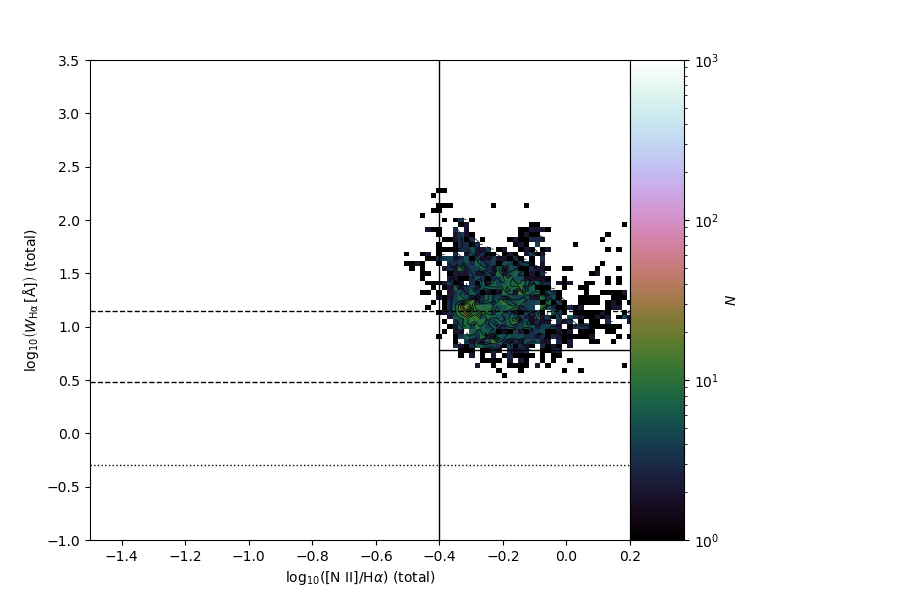

In [21]:
# Plot a 2D histogram showing the distribution of S7 spaxels in the WHAN diagram
_ = plot2dhistcontours(df=df,
              col_x=f"log N2 (total)",
              col_y=f"log HALPHA EW (total)",
              col_z="count", log_z=True,
              plot_colorbar=True)

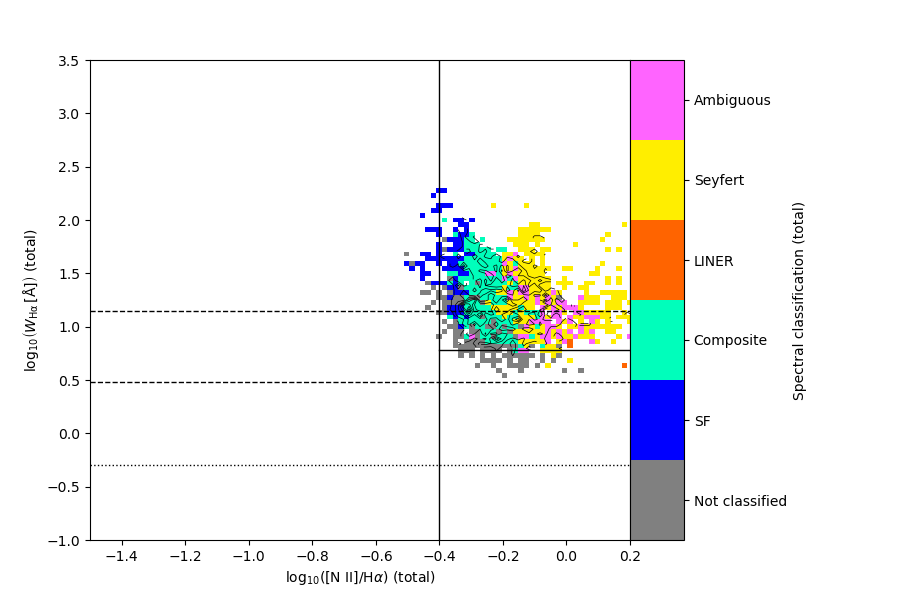

In [22]:
# Repeat the above, but colour by the median BPT classification
_ = plot2dhistcontours(df=df,
              col_x=f"log N2 (total)",
              col_y=f"log HALPHA EW (total)",
              col_z="BPT (total)", 
              plot_colorbar=True)

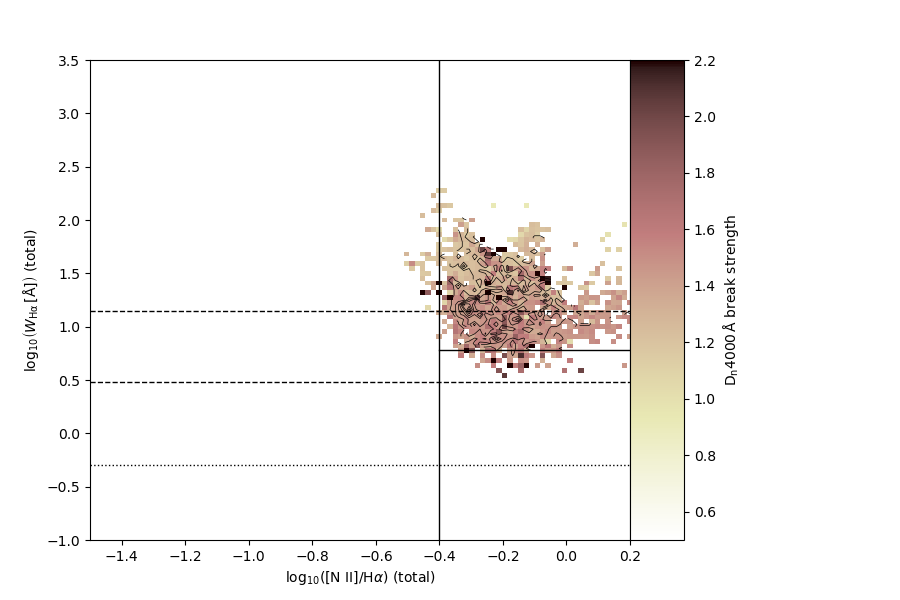

In [23]:
# Repeat the above, but colour by the D4000Å break strength
_ = plot2dhistcontours(df=df,
              col_x=f"log N2 (total)",
              col_y=f"log HALPHA EW (total)",
              col_z="D4000", 
              plot_colorbar=True)

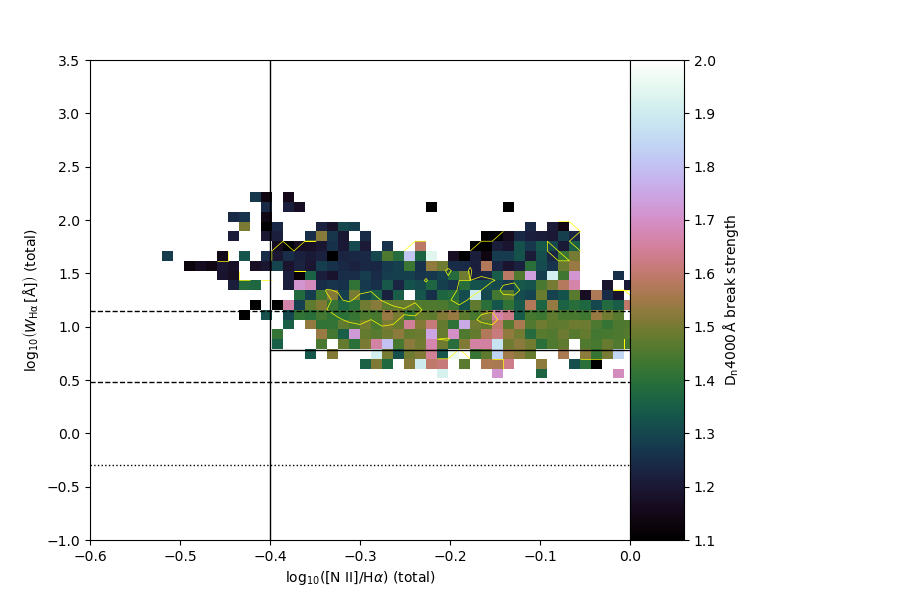

In [26]:
# If we like, we can use a different colourmap using the "cmap" keyword.
# The contour colours can also be changed using the "colors" keyword, and the levels can be changed using "levels".
# The axis limits can also be changed using the "xmin", "xmax", "ymin", "ymax" and "vmin", "vmax" keyword.
# We can also change the number of histogram bins using the "nbins" keyword.
import numpy as np
_ = plot2dhistcontours(df=df,
              col_x=f"log N2 (total)", xmin=-0.6, xmax=0.0,
              col_y=f"log HALPHA EW (total)", 
              col_z="D4000", vmin=1.1, vmax=2.0,
              nbins=50, 
              cmap="cubehelix", colors="yellow", levels=np.logspace(0, 4, 5),
              plot_colorbar=True)

#### Plot optical diagnostic ("BPT") diagrams for the full sample, showing the distribution of spaxels in the S7 galaxies

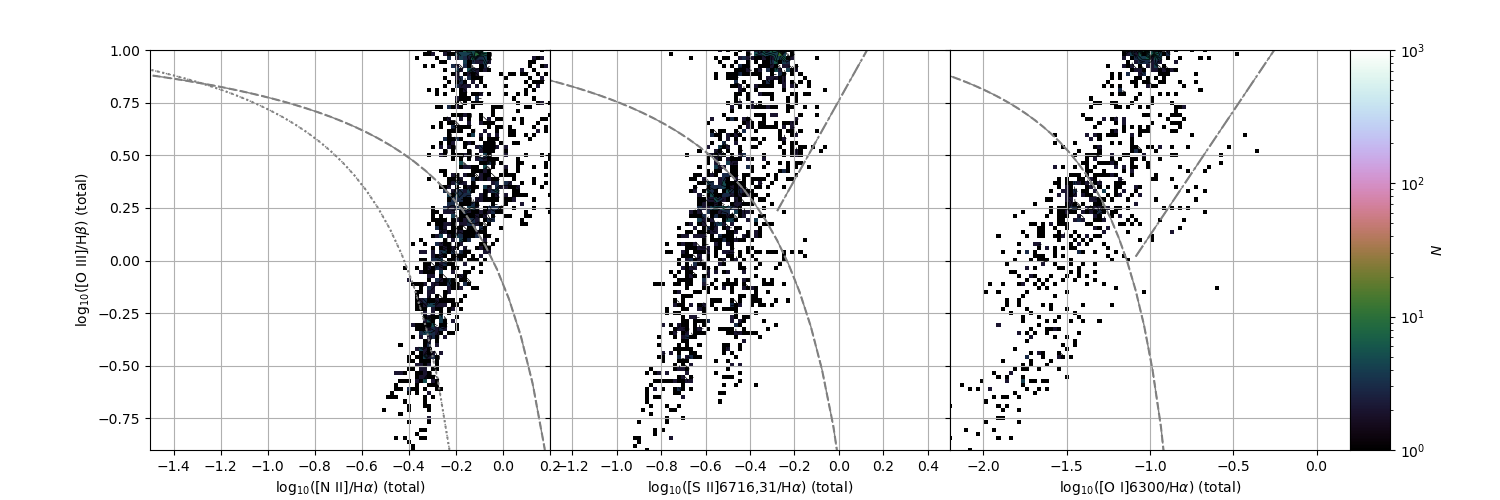

In [24]:
# Plot an empty BPT diagram
fig, axs_bpt = plot_empty_BPT_diagram(nrows=1)

# Plot 2D histograms showing the distribution of the entire sample
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    # Add BPT demarcation lines
    plot_BPT_lines(ax=axs_bpt[cc], col_x=col_x)    

    # Plot histograms showing distribution for whole sample
    _ = plot2dhistcontours(df=df,
                  col_x=f"{col_x} (total)",
                  col_y=f"log O3 (total)",
                  col_z="count", log_z=True,
                  ax=axs_bpt[cc],
                  cax=None,
                  plot_colorbar=True if cc==2 else False)

    if cc > 0:
        axs_bpt[cc].set_ylabel("")
    axs_bpt[cc].grid()

#### Repeat the above, but colour the histograms by $\sigma_{\rm gas}$

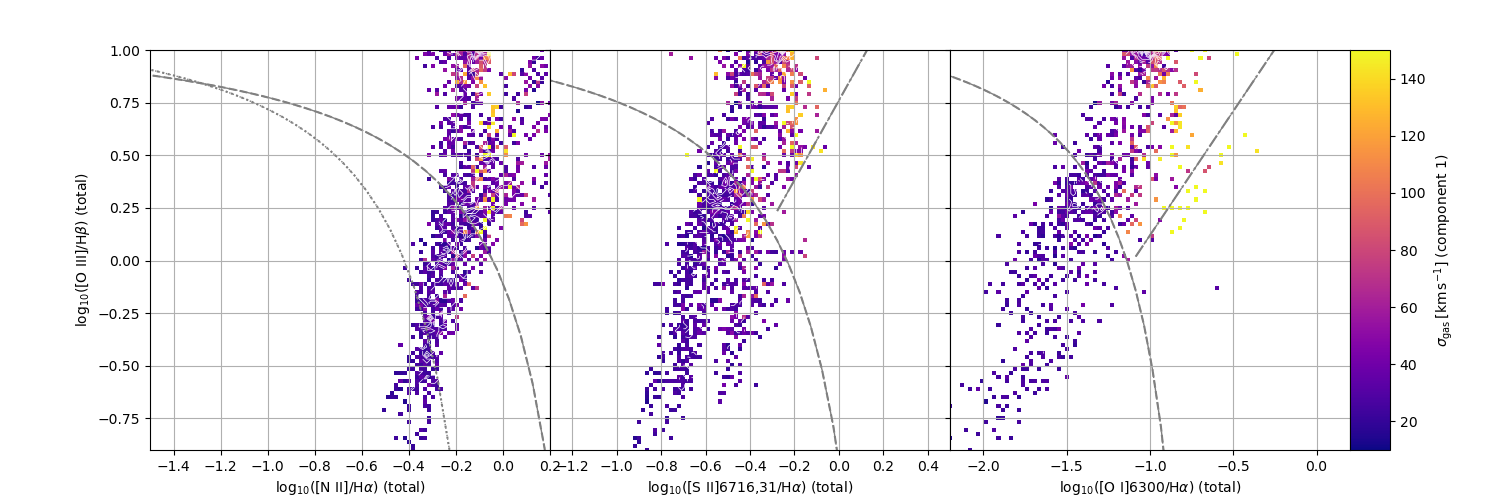

In [27]:
# Plot an empty BPT diagram
fig, axs_bpt = plot_empty_BPT_diagram(nrows=1)

# Plot 2D histograms showing the distribution of the entire sample
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    # Add BPT demarcation lines
    plot_BPT_lines(ax=axs_bpt[cc], col_x=col_x)    

    # Plot histograms showing distribution for whole sample
    _ = plot2dhistcontours(df=df,
                  col_x=f"{col_x} (total)",
                  col_y=f"log O3 (total)",
                  col_z="sigma_gas (component 1)", 
                  vmax=150,  # Tweak the z-axis scaling to bring out details 
                  ax=axs_bpt[cc],
                  cax=None, colors="white",
                  plot_colorbar=True if cc==2 else False)
    
    if cc > 0:
        axs_bpt[cc].set_ylabel("")
    axs_bpt[cc].grid()

## Using `spaxelsleuth.plotting` to plot individual galaxies
--- 
In the below cells, we will demonstrate how create plots based on individual S7 galaxies using functions in `spaxelsleuth.plotting`.


In [28]:
gal = "NGC1068"

#### Plot 2D maps showing various quantities in this galaxy
Given a DataFrame corresponding to a single galaxy, `plot2dmap()` reconstructs a 2D image of a specified column (e.g., velocity dispersion) from the rows and plots it. 

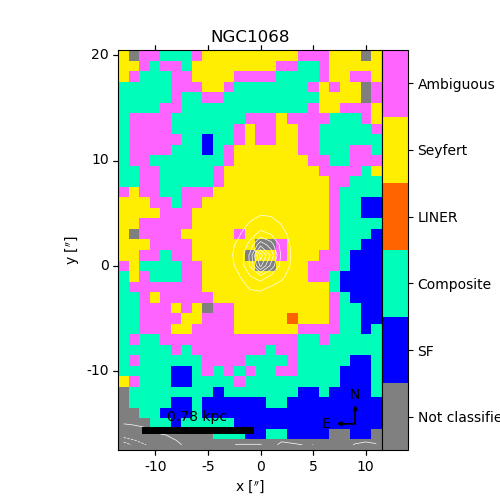

In [29]:
from spaxelsleuth.plotting.plot2dmap import plot2dmap
fig, ax = plot2dmap(df=df, gal=gal, col_z="BPT (total)")

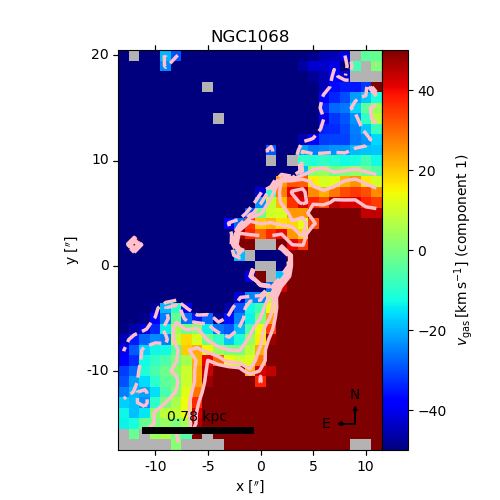

In [30]:
# Playing with input arguments 
# As in plot2dhistcontours, the maximum colour scaling can be set using "vmin" and "vmax" and the colourmap can be changed using "cmap". 
# The quantity that is used to plot contours can be set to any column in the DataFrame using "col_z_contours" and the colours and linewidths can be configured using "colours" and "linewidths".
_ = plot2dmap(df=df, gal=gal, col_z="v_gas (component 1)",
              cmap="jet", vmin=-50, vmax=+50,
              col_z_contours="v_gas (component 1)", levels=[-40, -20, 0, 20, 40], colors="pink", linewidths=2.5)


#### Scatter plots 
Create a BPT diagram with 2D histograms and contours showing the distribution in the full sample, with the data points from this galaxy overlaid on top using a scatter plot.

[Text(0, 0.5, ''), Text(0, 0.5, '')]

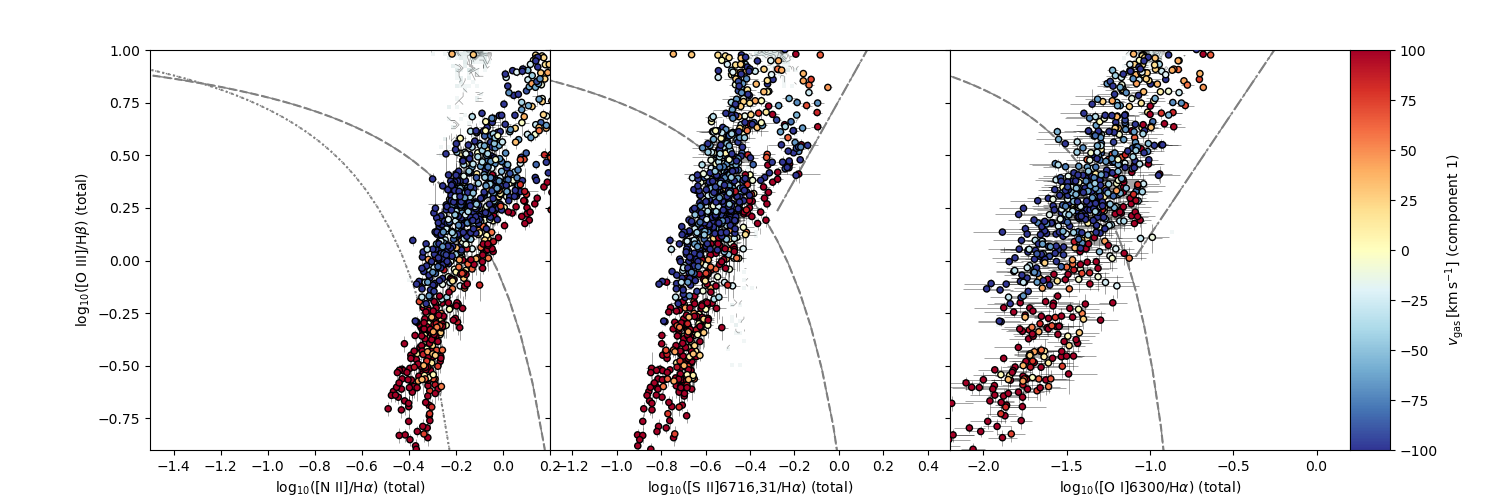

In [31]:
# Plot an empty BPT diagram
fig, axs_bpt = plot_empty_BPT_diagram(nrows=1)

# Plot 2D histograms showing the distribution of the entire sample
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    # Add BPT demarcation lines
    plot_BPT_lines(ax=axs_bpt[cc], col_x=col_x)    

    # Plot histograms showing distribution for whole sample
    _ = plot2dhistcontours(df=df,
                  col_x=f"{col_x} (total)",
                  col_y=f"log O3 (total)",
                  col_z="count", log_z=True,
                  cmap="bone_r", alpha=0.4,
                  ax=axs_bpt[cc],
                  plot_colorbar=False)
    
    # Scatter plot for this galaxy
    _ = plot2dscatter(df=df, gal=gal, 
                      col_x=f"{col_x} (total)",
                      col_y=f"log O3 (total)",
                      col_z=f"v_gas (component 1)",
                      ax=axs_bpt[cc],
                      vmin=-100, vmax=+100,
                      plot_colorbar=True if cc==2 else False)
    
# Turn of y-axis labels 
[ax.set_ylabel("") for ax in axs_bpt[1:]]